# Note

In this notebook, I show how to use eg.py.

# Importing some libraries

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import PyLHD

# Downloading analyzed file

In [3]:
# define some variables
shotnum = 120724 # shotnumber
diag = 'tsmap'   # diagname
filename = 'tsmap.dat' # local filename 

# downloading file
ts_filename = PyLHD.igetfile.igetfile(diag, shotnum, 1, filename)

data/tsmap/120000/120724/000001/tsmap@120724.dat.zip
tsmap@120724.dat.zip


In [4]:
print(ts_filename)

tsmap.dat


# Reading the downloaded file

In [5]:
# actual download
tsdata = PyLHD.eg.load(ts_filename)

# Members of eg_data

In [6]:
# dimension of the data.
print(tsdata.dim.keys())
# units of the dimension.
print(tsdata.DimUnit)

odict_keys(['Time', 'R'])
['s', 'm']


In [7]:
# data values corresponding to the dim.
print(tsdata.val.keys())
# units of the dimension.
print(tsdata.ValUnit)

odict_keys(['Te', 'dTe', 'n_e', 'dn_e', 'laser', 'lasernumber', 'reff', 'a99', 'p0', 'pf', 'ip', 'ipf', 'nl_thomson_mid', 'nl_mmw_mid', 'nl_thomson_3669', 'nl_fir_3669', 'nl_thomson_3579', 'nl_fir_3579', 'nl_thomson_3759', 'nl_fir_3759', 'nl_thomson_3849', 'nl_fir_3849', 'nl_thomson_3939', 'nl_fir_3939', 'chi', 'Wpe', 'dVdreff', 'geom_center', 'Rax_vmec', 'Te_median_smooth', 'ne_median_smooth', 'mask', 'phi'])
['keV', 'keV', 'arb', 'arb', 'arb', 'arb', 'm', 'm', '%', 'arb', 'kA/T', 'arb', 'arb', 'e19m-2', 'arb', 'e19m-2', 'arb', 'e19m-2', 'arb', 'e19m-2', 'arb', 'e19m-2', 'arb', 'e19m-2', 'arb', 'arb', 'm2', 'm', 'm', 'keV', 'arb', 'arb', 'Wb']


In [8]:
# Other properties
print(tsdata.Date, tsdata.NAME, tsdata.ShotNo)

01/05/201510:29 TSMAP 120724


In [9]:
# comments
for key, item in tsdata.comments.items():
    print(key, item)

Bt 2.75
Rax 3.6
Bq 100
Gamma 1.2538
phiedge -3.26342
avac 0.637
ExpDate 2013-11-06 16:56:17+09
Cycle 17
nel_fir_min 0.093
t1 3.033
t2 7.233
density (ne) is only for very rough information # density (ne) is only for very rough information
Do not use data for ne_bar < 5*1-^12cm-3 # Do not use data for ne_bar < 5*1-^12cm-3
High Voltage is set at 0.90 times # High Voltage is set at 0.90 times
Te limit 22keV
Laser#1, #3, #5, # Laser#1, #3, #5,
 #


# To access the data

eg.dim and eg.val are OrderedDict.

To access 'Time' axis, tsdata.dim['Time'] can be used.

In [10]:
# To access dim and val
print(tsdata.dim['Time'])

[ 0.     0.033  0.066  0.1    0.133  0.166  0.2    0.233  0.266  0.3    0.333
  0.366  0.4    0.433  0.466  0.5    0.533  0.566  0.6    0.633  0.666  0.7
  0.733  0.766  0.8    0.833  0.866  0.9    0.933  0.966  1.     1.033
  1.066  1.1    1.133  1.166  1.2    1.233  1.266  1.3    1.333  1.366  1.4
  1.433  1.466  1.5    1.533  1.566  1.6    1.633  1.666  1.7    1.733
  1.766  1.8    1.833  1.866  1.9    1.933  1.966  2.     2.033  2.066  2.1
  2.133  2.166  2.2    2.233  2.266  2.3    2.333  2.366  2.4    2.433
  2.466  2.5    2.533  2.566  2.6    2.633  2.666  2.7    2.733  2.766  2.8
  2.833  2.866  2.9    2.933  2.966  3.     3.033  3.066  3.1    3.133
  3.166  3.2    3.233  3.266  3.3    3.333  3.366  3.4    3.433  3.466  3.5
  3.533  3.566  3.6    3.633  3.666  3.7    3.733  3.766  3.8    3.833
  3.866  3.9    3.933  3.966  4.     4.033  4.066  4.1    4.133  4.166  4.2
  4.233  4.266  4.3    4.333  4.366  4.4    4.433  4.466  4.5    4.533
  4.566  4.6    4.633  4.666  4.7    4.7

In [11]:
# val is also an ordereddict, whose element is np.array
tsdata.val['Te'].shape

(300, 140)

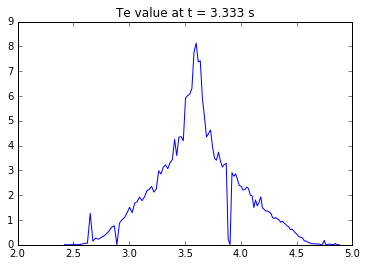

In [12]:
# Example of data
plt.plot(tsdata.dim['R'], tsdata.val['Te'][100,:])
plt.title('Te value at t = '+str(tsdata.dim['Time'][100]) + ' s')